# Lead scoring case study

## 1. Reading data

In [1]:
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
# Reading data
leads_data = pd.read_csv("Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads_data.shape

(9240, 37)

In [5]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## 2. Data cleaning

### 1. Analysing the columns

In [7]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In the dataset, it can be observed that some of the columns are irrelevant in building the model like Lead number is only a value assigned to each lead and hence we can drop this column. Similarly, some columns like Tags, Lead quality, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score are used to indicate the status and type of the lead for sales purposes after the sale call has been made and have no significance in assigning a lead score and hence can be dropped.

In [8]:
leads_data = leads_data.drop(['Lead Number', 'Tags', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Last Notable Activity', 'Last Activity'], 1)

Some columns have only one unique value and hence don't add any value to the analysis and can be dropped.

In [9]:
leads_data = leads_data.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],1)

### 2. Some columns have 'Select' as a value, this is as good as a null value and hence needs to be replaced by a null value.

In [10]:
leads_data['Lead Profile'] = leads_data['Lead Profile'].replace('Select', np.NaN)

In [11]:
leads_data['City'] = leads_data['City'].replace('Select', np.NaN)

In [12]:
leads_data['Specialization'] = leads_data['Specialization'].replace('Select', np.NaN)

In [13]:
leads_data['How did you hear about X Education'] = leads_data['How did you hear about X Education'].replace('Select', np.NaN)

In [14]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Country                                        6779 

### 3. Dealing with missing values

##### 1. Lead Score

In [15]:
leads_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [16]:
# We can replace the null values here with the mode value which is google
leads_data['Lead Source'].fillna(leads_data['Lead Source'].mode()[0], inplace = True)

In [17]:
leads_data['Lead Source'].isna().sum()

0

##### 2. TotalVisits

In [18]:
leads_data['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [19]:
# Replacing null values with mode value of this column
leads_data['TotalVisits'].fillna(0.0, inplace = True)

In [20]:
leads_data['TotalVisits'].isna().sum()

0

##### 3. Page Views Per Visit

In [21]:
leads_data['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [22]:
# Replacing null values with mode value of this column
leads_data['Page Views Per Visit'].fillna(0.0, inplace = True)

In [23]:
leads_data['Page Views Per Visit'].isna().sum()

0

##### 5. Country

In [24]:
leads_data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [25]:
# Since there are around 40% of null values, this column can be dropped
leads_data = leads_data.drop(['Country'], 1)

##### 6. Specialization

In [26]:
leads_data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [27]:
# We can replace the null values here with the most frequently occuring value
leads_data['Specialization'].fillna(leads_data['Specialization'].mode()[0], inplace = True)

In [28]:
leads_data['Specialization'].isna().sum()

0

##### 6. How did you hear about X Education

In [29]:
leads_data['How did you hear about X Education'].isna().sum()

7250

In [30]:
# Since there are more than 80% of null values, this column can be dropped
leads_data = leads_data.drop(['How did you hear about X Education'], 1)

##### 6. What is your current occupation

In [31]:
leads_data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [32]:
# We can replace the null values here with the mode value
leads_data['What is your current occupation'].fillna(leads_data['What is your current occupation'].mode()[0], inplace = True)

In [33]:
leads_data['What is your current occupation'].isna().sum()

0

##### 6. What matters most to you in choosing a course

In [34]:
leads_data['What matters most to you in choosing a course'].isna().sum()

2709

In [35]:
# Since there are around 40% of null values, this column can be dropped
leads_data = leads_data.drop(['What matters most to you in choosing a course'], 1)

##### 9. Lead Profile

In [36]:
leads_data['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [37]:
# Since there are around 80% of null values, this column can be dropped
leads_data = leads_data.drop(['Lead Profile'], 1)

##### 10. City

In [38]:
leads_data['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [39]:
# Since there are around 80% of null values, this column can be dropped
leads_data = leads_data.drop(['City'], 1)

In [40]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Do Not Call                             9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9240 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9240 non-null   float64
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [41]:
leads_data.isna().sum()

Prospect ID                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Specialization                            0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
A free copy of Mastering The Interview    0
dtype: int64

There are no null values and hence the data is clean

## 2. Data preparation

### 1. Converting Yes/No binary variables to 0/1

In [42]:
# Mapping function
def binary_mapping(var):
    return var.map({'Yes': 1, "No": 0})

In [43]:
# Applying the mapping function to the list
varlist =  ['Do Not Email', 'Do Not Call', 'A free copy of Mastering The Interview', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']
leads_data[varlist] = leads_data[varlist].apply(binary_mapping)

In [44]:
leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Finance Management,Unemployed,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Finance Management,Unemployed,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Business Administration,Student,0,0,0,0,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Media and Advertising,Unemployed,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Finance Management,Unemployed,0,0,0,0,0,0,0


### 2. One-hot encoding for variables with multiple features

In [45]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   int64  
 4   Do Not Call                             9240 non-null   int64  
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9240 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9240 non-null   float64
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [46]:
# Creating dummy variables for variable 'Lead Origin'
lo = pd.get_dummies(leads_data['Lead Origin'], prefix='Lead_Origin', drop_first=True)
#Merging the results with master dataframe
leads_data = pd.concat([leads_data,lo], axis=1)

# Creating dummy variables for variable 'Lead Source'
ls = pd.get_dummies(leads_data['Lead Source'], prefix='Lead_Source', drop_first=True)
#Merging the results with master dataframe
leads_data = pd.concat([leads_data,ls], axis=1)

# Creating dummy variables for variable 'Specialization'
s = pd.get_dummies(leads_data['Specialization'], prefix='Specialization', drop_first=True)
#Merging the results with master dataframe
leads_data = pd.concat([leads_data,s], axis=1)

# Creating dummy variables for variable 'What is your current occupation'
co = pd.get_dummies(leads_data['What is your current occupation'], prefix='Current_Occupation', drop_first=True)
#Merging the results with master dataframe
leads_data = pd.concat([leads_data,co], axis=1)

In [48]:
#Dropping duplicate columns
leads_data = leads_data.drop(['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation'], 1)

In [49]:
leads_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [50]:
leads_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 60 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Do Not Email                              9240 non-null   int64  
 2   Do Not Call                               9240 non-null   int64  
 3   Converted                                 9240 non-null   int64  
 4   TotalVisits                               9240 non-null   float64
 5   Total Time Spent on Website               9240 non-null   int64  
 6   Page Views Per Visit                      9240 non-null   float64
 7   Search                                    9240 non-null   int64  
 8   Newspaper Article                         9240 non-null   int64  
 9   X Education Forums                        9240 non-null   int64  
 10  Newspaper                           

It can be seen that all columns are now numeric

## 2. Test-Train Split

In [70]:
# Importing train_test_split function
from sklearn.model_selection import train_test_split

In [71]:
# Assigning all feature variables to X
X = leads_data.drop(['Converted', 'Prospect ID'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [72]:
# Assigning response variable to Y
Y = leads_data['Converted']
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [73]:
# Splitting the data into train and test
X_train_data, X_test_data, Y_train_data, Y_test_data = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [74]:
# Conversion rate
conversion = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
conversion

38.53896103896104

There is a conversion rate of 38.5%

## 3. Scaling of features

In [75]:
# Importing scaler
from sklearn.preprocessing import StandardScaler

In [76]:
standard_scaler = StandardScaler()
X_train_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = standard_scaler.fit_transform(X_train_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train_data.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional
1871,0,0,-0.645678,-0.885371,-1.062143,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6795,0,0,0.109111,0.005716,-0.452487,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3516,0,0,0.297808,-0.691418,0.083827,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8105,0,0,0.297808,1.365219,1.229797,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3934,0,0,-0.645678,-0.885371,-1.062143,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## 4. Correlations

In [77]:
# Correlation matrix
leads_data.corr()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional
Do Not Email,1.000000,-0.004322,-0.135580,0.033736,-0.046374,0.033445,-0.011443,-0.004322,-0.003056,-0.003056,...,0.023426,0.028032,0.053781,0.002680,0.059722,-0.009669,-0.002609,0.006225,0.042780,-0.049841
Do Not Call,-0.004322,1.000000,0.018581,0.003364,0.006801,-0.005628,-0.000573,-0.000216,-0.000153,-0.000153,...,-0.001539,-0.001313,-0.000970,-0.002915,-0.002205,-0.000484,-0.000613,-0.002244,0.004981,-0.004232
Converted,-0.135580,0.018581,1.000000,0.022502,0.362483,-0.014725,-0.002261,0.003465,-0.008238,-0.008238,...,-0.009755,0.007200,-0.014956,0.019245,-0.009457,0.041567,0.020505,-0.004375,-0.281065,0.313837
TotalVisits,0.033736,0.003364,0.022502,1.000000,0.209468,0.517122,0.049754,0.033787,0.035721,0.014210,...,0.038407,0.058949,0.016781,0.063671,0.065030,-0.008127,0.027284,-0.023539,0.015726,-0.009289
Total Time Spent on Website,-0.046374,0.006801,0.362483,0.209468,1.000000,0.301036,0.012654,0.011326,0.006195,0.025142,...,0.027458,0.020672,0.002900,0.049050,0.042640,0.007088,0.028115,-0.012518,-0.086489,0.099241
Page Views Per Visit,0.033445,-0.005628,-0.014725,0.517122,0.301036,1.000000,0.033597,0.023267,0.000828,0.004818,...,0.047270,0.027142,0.022127,0.066031,0.113997,-0.010309,0.016942,-0.031547,0.025897,-0.015201
Search,-0.011443,-0.000573,-0.002261,0.049754,0.012654,0.033597,1.000000,0.188573,0.267073,-0.000405,...,-0.004075,-0.003476,-0.002569,-0.007718,-0.005838,-0.001282,-0.001622,-0.005941,0.004025,-0.000730
Newspaper Article,-0.004322,-0.000216,0.003465,0.033787,0.011326,0.023267,0.188573,1.000000,0.707069,-0.000153,...,-0.001539,-0.001313,-0.000970,-0.002915,-0.002205,-0.000484,-0.000613,-0.002244,0.004981,-0.004232
X Education Forums,-0.003056,-0.000153,-0.008238,0.035721,0.006195,0.000828,0.267073,0.707069,1.000000,-0.000108,...,-0.001088,-0.000928,-0.000686,-0.002061,-0.001559,-0.000342,-0.000433,-0.001587,0.003522,-0.002992
Newspaper,-0.003056,-0.000153,-0.008238,0.014210,0.025142,0.004818,-0.000405,-0.000153,-0.000108,1.000000,...,-0.001088,-0.000928,-0.000686,-0.002061,-0.001559,-0.000342,-0.000433,-0.001587,0.003522,-0.002992


Since there are around 170 columns, we cannot find top correlations visually. Hence, we will list the top correlations for analysis

In [78]:
# Listing higly correlated columns

# Getting redundant pairs in the correlation matrix that is not considered to display the list i.e., lower triangular and diagonal pairs
def get_redundant_pairs(df):
    redundant_pairs = set()
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            redundant_pairs.add((df.columns[i], df.columns[j]))
    return redundant_pairs

# Getting top correlated pairs excluding the redundant pairs
def get_top_abs_correlations(df, n=5):
    corr = df.corr().abs().unstack()
    columns_to_drop = get_redundant_pairs(df)
    corr = corr.drop(labels=columns_to_drop).sort_values(ascending=False)
    return corr[0:n]

# Listing the top correlated pairs
print(get_top_abs_correlations(X_train_data, 10))

Lead_Origin_Lead Import                 Lead_Source_Facebook                       0.969542
Lead_Origin_Lead Add Form               Lead_Source_Reference                      0.862134
Current_Occupation_Unemployed           Current_Occupation_Working Professional    0.859776
Newspaper Article                       X Education Forums                         0.707052
Lead_Origin_Landing Page Submission     Specialization_Finance Management          0.603308
A free copy of Mastering The Interview  Lead_Source_Direct Traffic                 0.596913
X Education Forums                      Digital Advertisement                      0.577261
A free copy of Mastering The Interview  Lead_Origin_Landing Page Submission        0.564758
Lead_Origin_Landing Page Submission     Lead_Source_Direct Traffic                 0.526186
                                        Lead_Source_Olark Chat                     0.512668
dtype: float64


It can be observed that a lot of columns are highly correlated and hence we can drop some of the highly correlated columns

In [79]:
X_train_data = X_train_data.drop(['Current_Occupation_Working Professional'], 1)
X_test_data = X_test_data.drop(['Current_Occupation_Working Professional'], 1)

## 5. Model building

In [80]:
# Importing the stats model api
import statsmodels.api as sm

#### Building the first Logistic regression model

In [81]:
# Building the first Logistic regression model
lm1 = sm.GLM(Y_train_data,(sm.add_constant(X_train_data)), family = sm.families.Binomial())
lm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6411
Model Family:                Binomial   Df Model:                           56
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 18 Jul 2023   Deviance:                   1.7242e+05
Time:                        22:10:35   Pearson chi2:                 8.43e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                     7.137e+14   4.12e+07   1.73e+07      0.000    7.14e+14    7.14e+14
Do Not Email                             -4.746e+14   3.18e+06  -1.49e+08      0.000   -4.75e+14   -4.75e+14
Do Not Call                               3.385e+15   4.76e+07    7.1e+07      0.000    3.38e+15    3.38e+15
TotalVisits                                 1.8e+13   9.62e+05   1.87e+07      0.000     1.8e+13     1.8e+13
Total Time Spent on Website              -1.978e+14   9.36e+05  -2.11e+08      0.000   -1.98e+14   -1.98e+14
Page Views Per Visit                      4.068e+13   1.19e+06   3.43e+07      0.000    4.07e+13    4.07e+13
Search                                   -1.198e+15    2.2e+07  -5.44e+07      0.000    -1.2e+15    -1.2e+15
Newspaper Article                         7.548e+15   6.73e+07   1.12e+08      0.000    7.55e+15    7.55e+15
X Education Forums                        -7.87e+15   1.11e+08  -7.08e+07      0.000   -7.87e+15   -7.87e+15
Newspaper                                -3.625e+14   6.72e+07  -5.39e+06      0.000   -3.63e+14   -3.63e+14
Digital Advertisement                    -2.379e+15   4.76e+07  -4.99e+07      0.000   -2.38e+15   -2.38e+15
Through Recommendations                   1.111e+15   2.84e+07   3.91e+07      0.000    1.11e+15    1.11e+15
A free copy of Mastering The Interview    3.889e+13   2.62e+06   1.48e+07      0.000    3.89e+13    3.89e+13
Lead_Origin_Landing Page Submission       8.413e+13    2.9e+06    2.9e+07      0.000    8.41e+13    8.41e+13
Lead_Origin_Lead Add Form                 9.724e+14   1.29e+07   7.52e+07      0.000    9.72e+14    9.72e+14
Lead_Origin_Lead Import                   1.351e+15    4.8e+07   2.82e+07      0.000    1.35e+15    1.35e+15
Lead_Origin_Quick Add Form                2.936e+15   6.77e+07   4.34e+07      0.000    2.94e+15    2.94e+15
Lead_Source_Direct Traffic                3.781e+14   4.09e+07   9.24e+06      0.000    3.78e+14    3.78e+14
Lead_Source_Facebook                     -8.939e+14    6.3e+07  -1.42e+07      0.000   -8.94e+14   -8.94e+14
Lead_Source_Google                        4.818e+14   4.08e+07   1.18e+07      0.000    4.82e+14    4.82e+14
Lead_Source_Live Chat                     4.576e+15   6.13e+07   7.46e+07      0.000    4.58e+15    4.58e+15
Lead_Source_NC_EDM                        7.322e+15   7.86e+07   9.32e+07      0.000    7.32e+15    7.32e+15
Lead_Source_Olark Chat                    6.679e+14    4.1e+07   1.63e+07      0.000    6.68e+14    6.68e+14
Lead_Source_Organic Search                7.805e+13    4.1e+07   1.91e+06      0.000     7.8e+13     7.8e+13
Lead_Source_Pay per Click Ads            -2.373e+15   7.87e+07  -3.02e+07      0.000   -2.37e+15   -2.37e+15
Lead_Source_Press_Release      

### Feature selection using RFE

In [82]:
# Importing scikit learn modules
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [83]:
# Running RFE
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)        
rfe = rfe.fit(X_train_data, Y_train_data)

In [84]:
list(zip(X_train_data.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 14),
 ('TotalVisits', False, 33),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 41),
 ('Search', False, 39),
 ('Newspaper Article', False, 19),
 ('X Education Forums', False, 13),
 ('Newspaper', True, 1),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', False, 12),
 ('A free copy of Mastering The Interview', False, 36),
 ('Lead_Origin_Landing Page Submission', False, 17),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 34),
 ('Lead_Origin_Quick Add Form', False, 31),
 ('Lead_Source_Direct Traffic', False, 4),
 ('Lead_Source_Facebook', False, 16),
 ('Lead_Source_Google', False, 37),
 ('Lead_Source_Live Chat', False, 9),
 ('Lead_Source_NC_EDM', False, 3),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', False, 30),
 ('Lead_Source_Pay per Click Ads', False, 29),
 ('Lead_Source_Press_Release', False, 8),
 ('Lead_Source_Reference', True, 1),
 (

In [85]:
# Selected features from RFE
rfe_cols = X_train_data.columns[rfe.support_]
rfe_cols

Index(['Do Not Email', 'Total Time Spent on Website', 'Newspaper',
       'Digital Advertisement', 'Lead_Origin_Lead Add Form',
       'Lead_Source_Olark Chat', 'Lead_Source_Reference',
       'Lead_Source_Welingak Website', 'Lead_Source_google',
       'Specialization_Hospitality Management',
       'Specialization_Rural and Agribusiness', 'Current_Occupation_Housewife',
       'Current_Occupation_Other', 'Current_Occupation_Student',
       'Current_Occupation_Unemployed'],
      dtype='object')

#### Assessing the model using statsmodel

In [86]:
# Running the model on selected features
X_train_sm1 = sm.add_constant(X_train_data[rfe_cols])
lm2 = sm.GLM(Y_train_data,X_train_sm1, family = sm.families.Binomial())
res = lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3018.5
Date:                Tue, 18 Jul 2023   Deviance:                       6037.1
Time:                        22:10:41   Pearson chi2:                 7.78e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3270
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.7269      0.173      9.992      0.000       1.388       2.066
Do Not Email                             -1.3688      0.157     -8.734      0.000      -1.676      -1.062
Total Time Spent on Website               1.1077      0.037     29.740      0.000       1.035       1.181
Newspaper                               -25.1916   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Digital Advertisement                   -22.4519   4.37e+04     -0.001      1.000   -8.57e+04    8.56e+04
Lead_Origin_Lead Add Form                 3.5325      0.459      7.690      0.000       2.632       4.433
Lead_Source_Olark Chat                    0.7346      0.091      8.074      0.000       0.556       0.913
Lead_Source_Reference                     0.2947      0.494      0.597      0.550      -0.673       1.262
Lead_Source_Welingak Website              2.3804      0.850      2.799      0.005       0.714       4.047
Lead_Source_google                      -22.6732   3.16e+04     -0.001      0.999    -6.2e+04    6.19e+04
Specialization_Hospitality Management    -0.8516      0.308     -2.767      0.006      -1.455      -0.248
Specialization_Rural and Agribusiness     0.6701      0.365      1.837      0.066      -0.045       1.385
Current_Occupation_Housewife             20.8048   2.23e+04      0.001      0.999   -4.37e+04    4.37e+04
Current_Occupation_Other                 -3.2011      0.785     -4.079      0.000      -4.739      -1.663
Current_Occupation_Student               -2.6070      0.274     -9.513      0.000      -3.144      -2.070
Current_Occupation_Unemployed            -2.7931      0.175    -15.956      0.000      -3.136      -2.450
=========================================================================================================
"""

In [87]:
# Since the p-values of few columns are very high they can be dropped
rfe_cols = rfe_cols.drop(['Newspaper', 'Lead_Source_google', 'Specialization_Rural and Agribusiness', 'Current_Occupation_Housewife','Lead_Source_Reference','Digital Advertisement' ], 1)

In [88]:
# Running the model on newly filtered features
X_train_sm2 = sm.add_constant(X_train_data[rfe_cols])
lm3 = sm.GLM(Y_train_data,X_train_sm2, family = sm.families.Binomial())
res = lm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3025.6
Date:                Tue, 18 Jul 2023   Deviance:                       6051.2
Time:                        22:11:04   Pearson chi2:                 7.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3255
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.7519      0.172     10.161      0.000       1.414       2.090
Do Not Email                             -1.3735      0.156     -8.786      0.000      -1.680      -1.067
Total Time Spent on Website               1.1045      0.037     29.720      0.000       1.032       1.177
Lead_Origin_Lead Add Form                 3.7837      0.185     20.416      0.000       3.420       4.147
Lead_Source_Olark Chat                    0.7299      0.091      8.031      0.000       0.552       0.908
Lead_Source_Welingak Website              2.1249      0.741      2.867      0.004       0.672       3.578
Specialization_Hospitality Management    -0.8490      0.307     -2.763      0.006      -1.451      -0.247
Current_Occupation_Other                 -3.2219      0.785     -4.106      0.000      -4.760      -1.684
Current_Occupation_Student               -2.6064      0.273     -9.543      0.000      -3.142      -2.071
Current_Occupation_Unemployed            -2.8152      0.175    -16.117      0.000      -3.158      -2.473
=========================================================================================================
"""

In [89]:
# Getting the predicted values on the train set
Y_train_pred = res.predict(X_train_sm2)
Y_train_pred[:10]

1871    0.212280
6795    0.257889
3516    0.250299
8105    0.609352
3934    0.212280
4844    0.978321
3297    0.133612
8071    0.994764
987     0.402730
7423    0.753537
dtype: float64

In [90]:
Y_train_pred = Y_train_pred.values.reshape(-1)
Y_train_pred[:10]

array([0.2122799 , 0.25788875, 0.25029922, 0.6093523 , 0.2122799 ,
       0.97832148, 0.13361229, 0.99476384, 0.4027304 , 0.75353673])

#### Creating a dataframe with the actual Conversion column and the Lead score based on the predicted probabilities (Lead score = probabilty * 100)

In [121]:
Y_train_pred_final = pd.DataFrame({'Conversion':Y_train_data.values, 'Lead Score':Y_train_pred})
Y_train_pred_final['Prospect_ID'] = Y_train_data.index
Y_train_pred_final.head()

,Conversion,Lead Score,Prospect_ID
0,0,0.212280,1871
1,0,0.257889,6795
2,0,0.250299,3516
3,0,0.609352,8105
4,0,0.212280,3934


In [122]:
# Creating a new column for predicted conversion
Y_train_pred_final['Predicted_Conversion'] = Y_train_pred_final['Lead Score'].map(lambda x: 1 if x > 0.5 else 0)
Y_train_pred_final.head()

,Conversion,Lead Score,Prospect_ID,Predicted_Conversion
0,0,0.212280,1871,0
1,0,0.257889,6795,0
2,0,0.250299,3516,0
3,0,0.609352,8105,1
4,0,0.212280,3934,0


#### Calculating accuracy

In [123]:
from sklearn import metrics

In [124]:
# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_final.Conversion, Y_train_pred_final.Predicted_Conversion )
print(confusion)

[[3531  471]
 [ 880 1586]]


In [125]:
print(metrics.accuracy_score(Y_train_pred_final.Conversion, Y_train_pred_final.Predicted_Conversion))

0.7911255411255411


#### Checking VIFs

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [127]:
# Creating a dataframe containing VIFs of all feature variables
vif = pd.DataFrame()
vif['Features'] = X_train_data[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_data[rfe_cols].values, i) for i in range(X_train_data[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead_Source_Olark Chat,1.47
8,Current_Occupation_Unemployed,1.47
2,Lead_Origin_Lead Add Form,1.30
4,Lead_Source_Welingak Website,1.22
1,Total Time Spent on Website,1.19
0,Do Not Email,1.10
5,Specialization_Hospitality Management,1.02
7,Current_Occupation_Student,1.02
6,Current_Occupation_Other,1.00


All the columns have low VIF values, hence we can use this as final model

In [128]:
# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_final.Conversion, Y_train_pred_final.Predicted_Conversion )
print(confusion)

[[3531  471]
 [ 880 1586]]


In [129]:
print(metrics.accuracy_score(Y_train_pred_final.Conversion, Y_train_pred_final.Predicted_Conversion))

0.7911255411255411


There is an accuracy of around 80%

In [130]:
#Other metrics
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [131]:
# Sensitivity
Sensitivity = TP / float(TP+FN)
Sensitivity

0.643146796431468

Sensitivity of around 64%

In [132]:
#False positive rate
FPR = FP/ float(TN+FP)
FPR

0.1176911544227886

There's false positive of around 11%

In [133]:
#True Positive Rate
TPR = TP / float(TP+FP)
TPR

0.771025765678172

There's true positive of around 77%

## 6. ROC curve

In [134]:
import matplotlib.pyplot as plt

In [135]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='Area under ROC curve is %0.2f' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

In [138]:
fpr, tpr, thresholds = metrics.roc_curve( Y_train_pred_final.Conversion, Y_train_pred_final['Lead Score'], drop_intermediate = False )

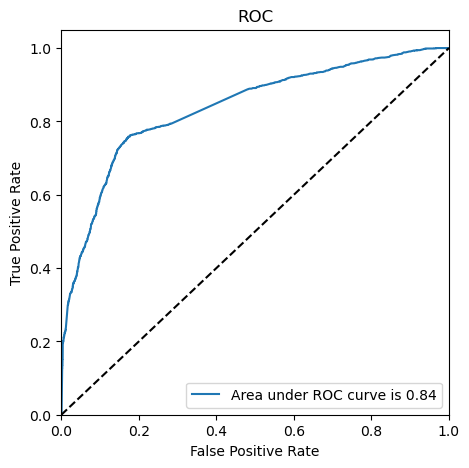

In [139]:
draw_roc(Y_train_pred_final.Conversion,Y_train_pred_final['Lead Score'])

Area under the ROC curve is 0.84

## 7. Finding the optimal cut-off

In [141]:
# Creating columns with different probability cutoffs 
nums = [float(x)/10 for x in range(10)]
for i in nums:
    Y_train_pred_final[i]= Y_train_pred_final['Lead Score'].map(lambda x: 1 if x > i else 0)
Y_train_pred_final.head()

,Conversion,Lead Score,Prospect_ID,Predicted_Conversion,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.212280,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.257889,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.250299,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.609352,8105,1,1,1,1,1,1,1,1,0,0,0
4,0,0.212280,3934,0,1,1,1,0,0,0,0,0,0,0


In [142]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_final.Conversion, Y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.435220  0.992701  0.091704
0.2   0.2  0.645176  0.894566  0.491504
0.3   0.3  0.801020  0.758313  0.827336
0.4   0.4  0.802566  0.711273  0.858821
0.5   0.5  0.791126  0.643147  0.882309
0.6   0.6  0.771954  0.545823  0.911294
0.7   0.7  0.754638  0.444850  0.945527
0.8   0.8  0.731293  0.339011  0.973013
0.9   0.9  0.695269  0.210462  0.994003


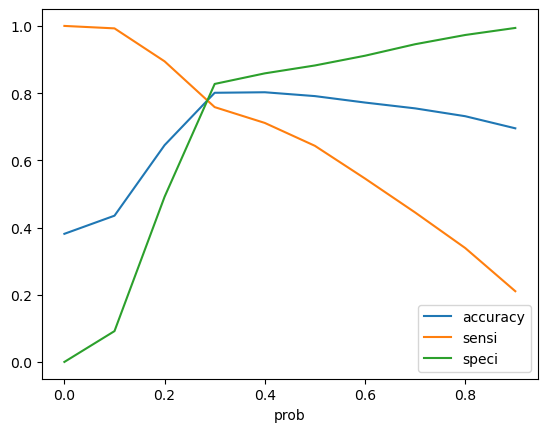

In [143]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

0.3 is the optimal cut-off

In [145]:
Y_train_pred_final['Predicted_Conversion'] = Y_train_pred_final['Lead Score'].map(lambda x: 1 if x > 0.3 else 0)
Y_train_pred_final.head()

,Conversion,Lead Score,Prospect_ID,Predicted_Conversion,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.212280,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.257889,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.250299,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.609352,8105,1,1,1,1,1,1,1,1,0,0,0
4,0,0.212280,3934,0,1,1,1,0,0,0,0,0,0,0


In [146]:
metrics.accuracy_score(Y_train_pred_final.Conversion, Y_train_pred_final.Predicted_Conversion)

0.8010204081632653

In [147]:
confusion2 = metrics.confusion_matrix(Y_train_pred_final.Conversion, Y_train_pred_final.Predicted_Conversion )
confusion2

array([[3311,  691],
       [ 596, 1870]], dtype=int64)

In [148]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [149]:
Sensitivity = TP / float(TP+FN)
Sensitivity

0.7583130575831306

In [150]:
FPR = FP/ float(TN+FP)
FPR

0.17266366816591705

In [151]:
TPR = TP / float(TP+FP)
TPR

0.7301835220616947

#### Precision and recall

In [152]:
confusion = metrics.confusion_matrix(Y_train_pred_final.Conversion, Y_train_pred_final.Predicted_Conversion)
confusion

array([[3311,  691],
       [ 596, 1870]], dtype=int64)

In [154]:
Precision = confusion[1,1]/(confusion[0,1]+confusion[1,1])
Precision

0.7301835220616947

In [155]:
Recall = confusion[1,1]/(confusion[1,0]+confusion[1,1])
Recall

0.7583130575831306

Precision of 73% and recall of 75%

## 8. Prediction on test set

In [157]:
X_test_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = standard_scaler.transform(X_test_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [159]:
X_test_data = X_test_data[rfe_cols]
X_test_data.head()

,Do Not Email,Total Time Spent on Website,Lead_Origin_Lead Add Form,Lead_Source_Olark Chat,Lead_Source_Welingak Website,Specialization_Hospitality Management,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed
4269,0,0.964504,0,0,0,0,0,0,1
2376,0,-0.885371,1,0,0,0,0,0,1
7766,0,-0.777416,0,0,0,0,0,0,0
9199,0,-0.885371,0,1,0,0,0,0,1
4359,0,-0.885371,1,0,0,0,0,0,1


In [160]:
X_test_sm = sm.add_constant(X_test_data)

In [161]:
Y_test_pred = res.predict(X_test_sm)

In [163]:
Y_test_pred[:10]

4269    0.500501
2376    0.851010
7766    0.709570
9199    0.212280
4359    0.851010
9186    0.309095
1631    0.501511
8963    0.182492
8007    0.206531
5324    0.152152
dtype: float64

In [165]:
y_pred_1 = pd.DataFrame(Y_test_pred)
y_pred_1.head()

,0
4269,0.500501
2376,0.851010
7766,0.709570
9199,0.212280
4359,0.851010


In [166]:
y_test_df = pd.DataFrame(Y_test_data)
y_test_df['Prospect ID'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.500501
1,1,2376,0.851010
2,1,7766,0.709570
3,0,9199,0.212280
4,1,4359,0.851010


In [167]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead Score'})

In [168]:
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Lead Score'], axis=1)

In [169]:
y_pred_final.head()

,Prospect ID,Converted,Lead Score
0,4269,1,0.500501
1,2376,1,0.851010
2,7766,1,0.709570
3,9199,0,0.212280
4,4359,1,0.851010


In [171]:
y_pred_final['Predicted_Conversion'] = y_pred_final['Lead Score'].map(lambda x: 1 if x > 0.3 else 0)

In [172]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Predicted_Conversion)

0.7925685425685426

In [173]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Predicted_Conversion )
confusion2

array([[1375,  302],
       [ 273,  822]], dtype=int64)

In [174]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [175]:

# Sensitivity
Sensitivity = TP / float(TP+FN)
Sensitivity

0.7506849315068493

In [176]:
#False positive rate
FPR = FP/ float(TN+FP)
FPR

0.1800834824090638

In [177]:

#True Positive Rate
TPR = TP / float(TP+FP)
TPR

0.7313167259786477